In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
df=pd.read_csv("Students Social Media Addiction.csv")

In [3]:
df.shape

(705, 13)

In [4]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [6]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [7]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [8]:
df.dtypes

Student_ID                        int64
Age                               int64
Gender                           object
Academic_Level                   object
Country                          object
Avg_Daily_Usage_Hours           float64
Most_Used_Platform               object
Affects_Academic_Performance     object
Sleep_Hours_Per_Night           float64
Mental_Health_Score               int64
Relationship_Status              object
Conflicts_Over_Social_Media       int64
Addicted_Score                    int64
dtype: object

In [9]:
df.isnull().sum().sort_values(ascending=False)

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Gender',
 'Academic_Level',
 'Country',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Relationship_Status']

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Student_ID',
 'Age',
 'Avg_Daily_Usage_Hours',
 'Sleep_Hours_Per_Night',
 'Mental_Health_Score',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

In [12]:
#Question 1 — Distribution of Addiction Score
col = 'Mental_Health_Score'
data = pd.to_numeric(df[col], errors='coerce').dropna()
data

0      6
1      8
2      5
3      7
4      6
      ..
700    7
701    4
702    6
703    8
704    5
Name: Mental_Health_Score, Length: 705, dtype: int64

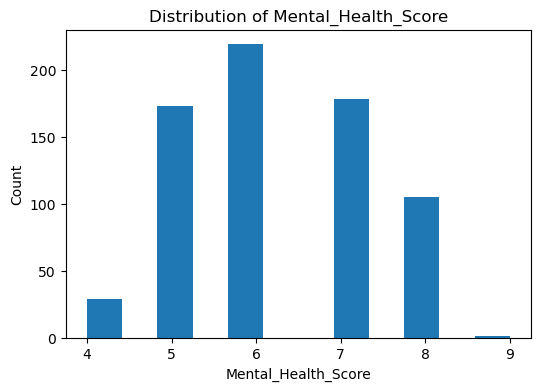

In [13]:
plt.figure(figsize=(6,4))
plt.hist(data, bins=12)
plt.xlabel(col); plt.ylabel('Count'); plt.title(f'Distribution of {col}')
plt.show()

In [14]:
#Question 2 — Average Addiction Score by Gender
col = 'Mental_Health_Score'
grp = df.groupby('Gender')[col].mean().sort_values()
grp

Gender
Female    6.175637
Male      6.278409
Name: Mental_Health_Score, dtype: float64

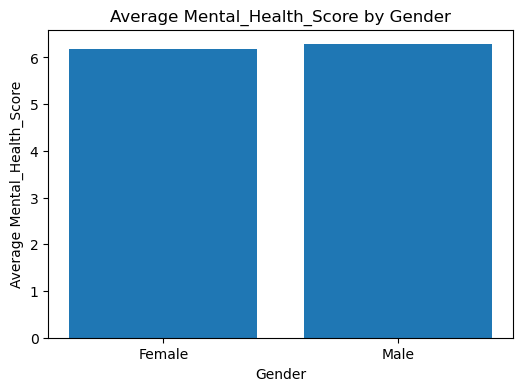

In [15]:
plt.figure(figsize=(6,4))
plt.bar(grp.index.astype(str), grp.values)
plt.xlabel('Gender'); plt.ylabel(f'Average {col}'); plt.title(f'Average {col} by Gender')
plt.show()

In [16]:
#Question 3 — Crosstab: Gender vs High Addiction
col = 'Mental_Health_Score'
df['High_Addiction'] = df[col] >= df[col].median()
ct = pd.crosstab(df['Gender'], df['High_Addiction'])
ct

High_Addiction,False,True
Gender,,
Female,115,238
Male,87,265


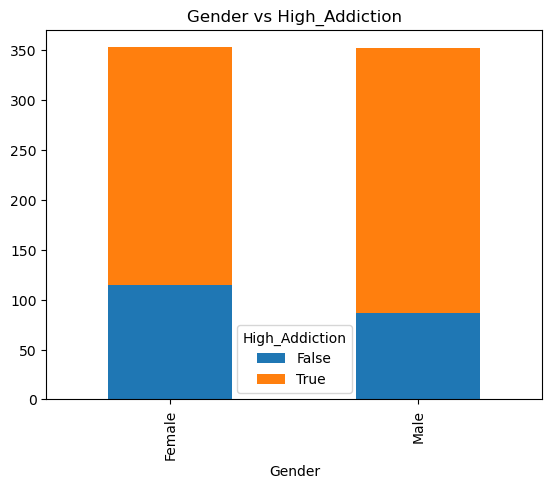

In [17]:
ct.plot(kind='bar', stacked=True)
plt.title('Gender vs High_Addiction')
plt.show()

In [18]:
#Question 4 — Pivot table: Mean Hours by Grade and Gender
pt = pd.pivot_table(df, values='Avg_Daily_Usage_Hours', index='Academic_Level', columns='Gender', aggfunc='mean')
pt

Gender,Female,Male
Academic_Level,,
Graduate,4.729167,4.785199
High School,5.840000,5.175000
Undergraduate,5.014828,4.939683


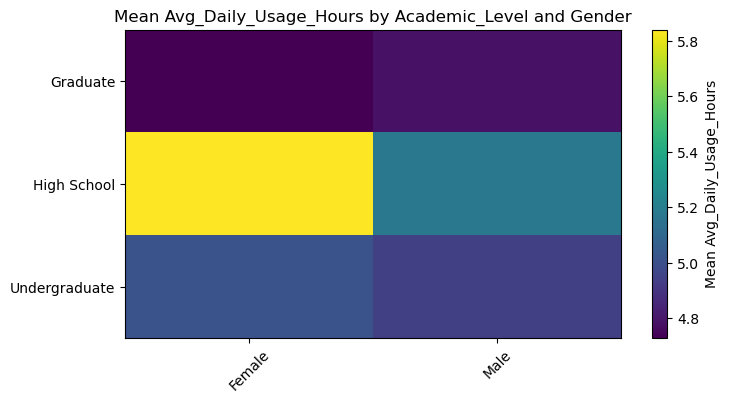

In [19]:
plt.figure(figsize=(8,4))
plt.imshow(pt.fillna(0).values, aspect='auto')
plt.colorbar(label='Mean Avg_Daily_Usage_Hours')
plt.yticks(range(len(pt.index)), pt.index.astype(str))
plt.xticks(range(len(pt.columns)), pt.columns.astype(str), rotation=45)
plt.title('Mean Avg_Daily_Usage_Hours by Academic_Level and Gender')
plt.show()

In [20]:
#Question 5 — Top platforms/apps used
vc = df['Most_Used_Platform'].value_counts().head(10)
vc

Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
Name: count, dtype: int64

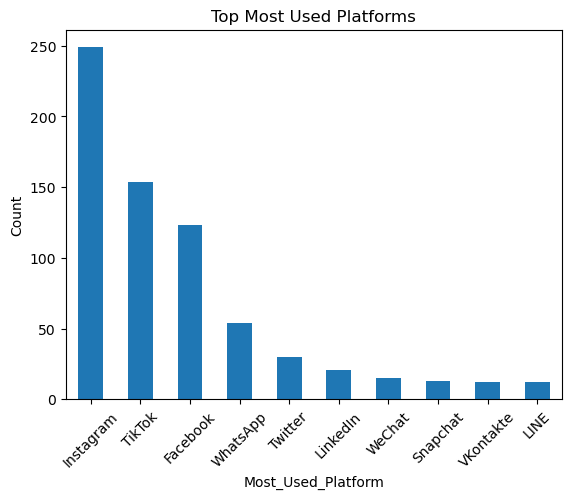

In [21]:
vc.plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Count'); plt.title('Top Most Used Platforms')
plt.show()

In [22]:
#Question 6 — Boxplot: Addiction Score by Device
groups = df.groupby('Most_Used_Platform')['Mental_Health_Score'].apply(list)
groups

Most_Used_Platform
Facebook     [6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, ...
Instagram    [6, 4, 7, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, ...
KakaoTalk                 [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
LINE                      [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
LinkedIn     [9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...
Snapchat               [6, 5, 6, 6, 6, 6, 4, 5, 6, 5, 7, 5, 5]
TikTok       [5, 7, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, ...
Twitter      [8, 8, 7, 8, 6, 7, 8, 6, 7, 8, 7, 6, 7, 8, 7, ...
VKontakte                 [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
WeChat           [7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6]
WhatsApp     [5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, ...
YouTube                         [7, 7, 7, 7, 7, 7, 6, 6, 5, 7]
Name: Mental_Health_Score, dtype: object

C:\Users\sasan\AppData\Local\Temp\ipykernel_22052\405019160.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups.tolist(), labels=[str(x) for x in groups.index])


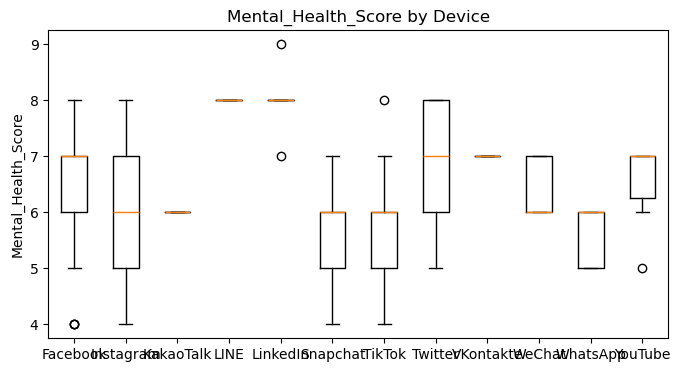

In [23]:
plt.figure(figsize=(8,4))
plt.boxplot(groups.tolist(), labels=[str(x) for x in groups.index])
plt.ylabel('Mental_Health_Score'); plt.title('Mental_Health_Score by Device')
plt.show()

In [24]:
#Question 8 — Groupby: Count and Mean Addiction by Grade
grp = df.groupby('Academic_Level')['Mental_Health_Score'].agg(['count','mean']).sort_values('mean')
grp

,count,mean
Academic_Level,,
High School,27,5.111111
Undergraduate,353,6.178470
Graduate,325,6.372308


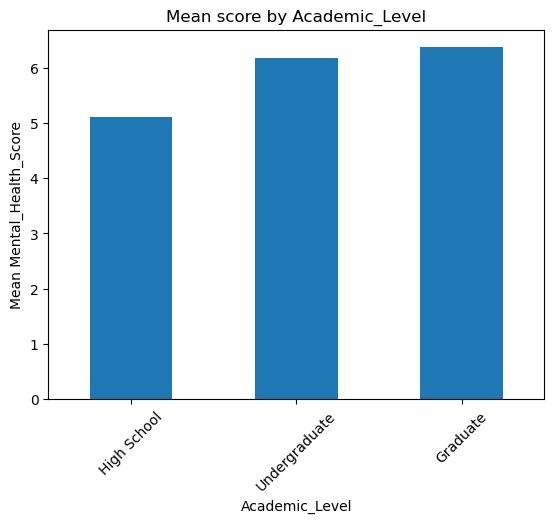

In [25]:
grp['mean'].plot(kind='bar')
plt.xticks(rotation=45); plt.ylabel('Mean Mental_Health_Score'); plt.title('Mean score by Academic_Level')
plt.show()

In [26]:
#Question 9 — Percentage distribution of Gender
vc = df['Gender'].value_counts(dropna=False)
vc

Gender
Female    353
Male      352
Name: count, dtype: int64

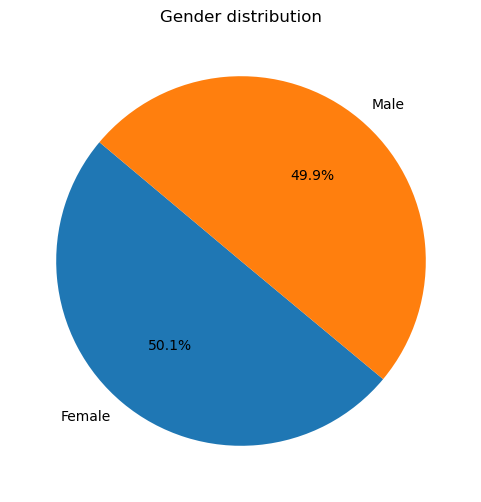

In [27]:
plt.figure(figsize=(6,6))
plt.pie(vc.values, labels=vc.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Gender distribution')
plt.show()

In [28]:
#Question 10 — Pivot: Mean Hours by country
pt = df.pivot_table(values='Avg_Daily_Usage_Hours', index='Country', aggfunc='mean')
pt

,Avg_Daily_Usage_Hours
Country,
Afghanistan,2.9
Albania,4.7
Andorra,5.3
Argentina,5.5
Armenia,5.9
...,...
Uzbekistan,5.5
Vatican City,4.4
Venezuela,3.3


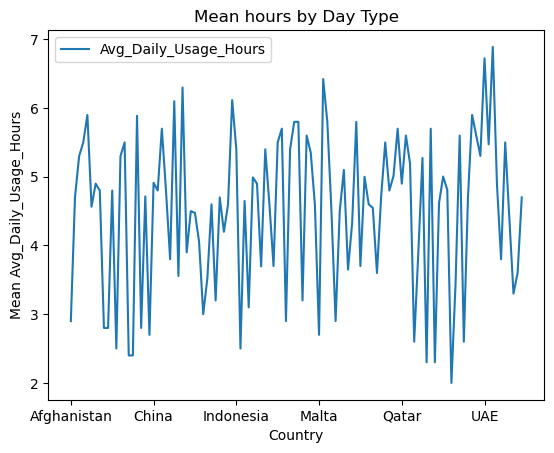

In [29]:
pt.plot(kind='line')
plt.ylabel('Mean Avg_Daily_Usage_Hours'); plt.title('Mean hours by Day Type')
plt.show()

In [30]:
#Question 11— Scatter: Hours spent vs Addiction
x = pd.to_numeric(df['Avg_Daily_Usage_Hours'], errors='coerce')
y = pd.to_numeric(df['Mental_Health_Score'], errors='coerce')

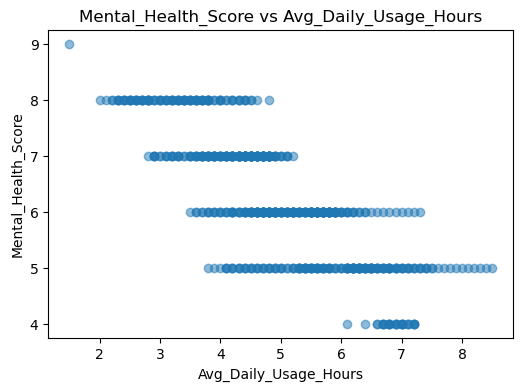

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Avg_Daily_Usage_Hours'); plt.ylabel('Mental_Health_Score'); plt.title('Mental_Health_Score vs Avg_Daily_Usage_Hours')
plt.show()

In [32]:
#Question 12 — Pivot: Mean Addiction by Platform 
pt = pd.pivot_table(df, values='Mental_Health_Score', index='Most_Used_Platform', columns='Addicted_Score', aggfunc='mean')
pt

Addicted_Score,2,3,4,5,6,7,8,9
Most_Used_Platform,,,,,,,,
Facebook,NaN,NaN,7.960000,7.000000,7.000000,6.000000,5.00000,4.000000
Instagram,NaN,NaN,7.967742,7.195652,6.947368,5.711111,5.00000,4.533333
KakaoTalk,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
LINE,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN
LinkedIn,9.0,8.0,8.000000,7.000000,NaN,NaN,NaN,NaN
Snapchat,NaN,NaN,NaN,NaN,7.000000,5.833333,5.20000,4.000000
TikTok,NaN,NaN,8.000000,7.000000,7.000000,6.000000,5.37931,4.500000
Twitter,NaN,8.0,8.000000,7.000000,NaN,6.000000,5.00000,NaN
VKontakte,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN


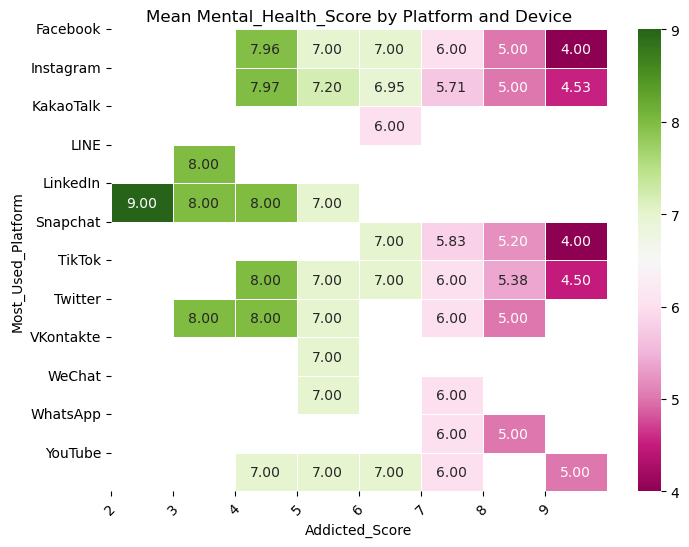

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(pt, annot=True, cmap="PiYG", fmt=".2f", linewidths=0.5)
plt.yticks(range(len(pt.index)), pt.index.astype(str))
plt.xticks(range(len(pt.columns)), pt.columns.astype(str), rotation=45)
plt.title('Mean Mental_Health_Score by Platform and Device')
plt.show()

In [34]:
#Question 13 — Top effects/problems mentioned
vc = df['Affects_Academic_Performance'].value_counts().head(15)
vc

Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

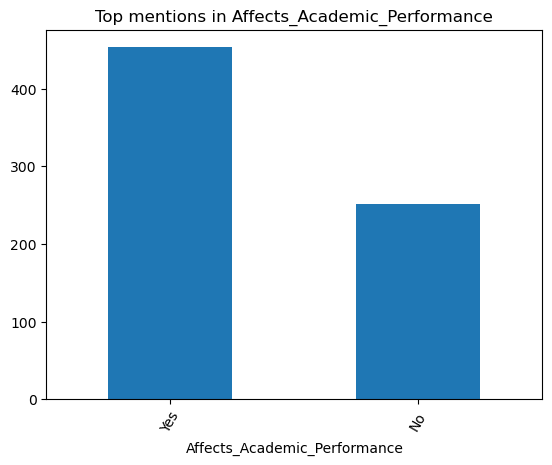

In [35]:
vc.plot(kind='bar')
plt.xticks(rotation=60); plt.title('Top mentions in Affects_Academic_Performance')
plt.show()

In [36]:
#Question 14— Mean Addiction by AgeGroup
grp = df.groupby('Age')['Mental_Health_Score'].mean().dropna()
grp

Age
18    5.214286
19    6.055215
20    6.218182
21    6.160256
22    6.476190
23    6.647059
24    6.346154
Name: Mental_Health_Score, dtype: float64

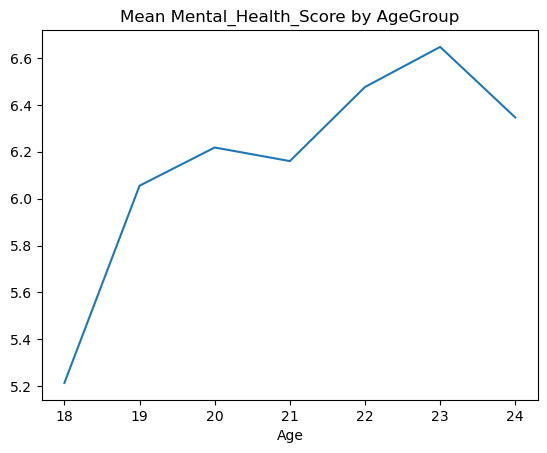

In [37]:
grp.plot(kind='line')
plt.title('Mean Mental_Health_Score by AgeGroup')
plt.show()

In [38]:
#Question 15 — Crosstab: Count of respondents by Grade and Gender
ct = pd.crosstab(df['Academic_Level'], df['Gender'])
ct

Gender,Female,Male
Academic_Level,,
Graduate,48,277
High School,15,12
Undergraduate,290,63


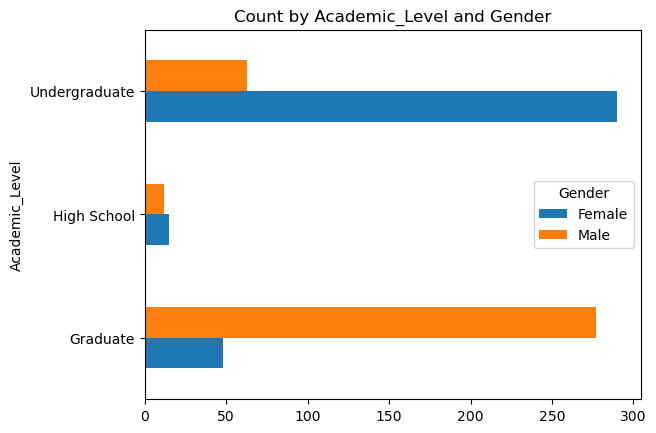

In [39]:
ct.plot(kind='barh')
plt.title('Count by Academic_Level and Gender')
plt.show()

In [40]:
#Question 16— Top 5 respondents with highest addiction score
top5 = df.nlargest(5, 'Mental_Health_Score')
print(top5[['Student_ID','Age','Gender','Academic_Level','Mental_Health_Score']])

    Student_ID  Age  Gender Academic_Level  Mental_Health_Score
6            7   23    Male       Graduate                    9
1            2   22    Male       Graduate                    8
12          13   22    Male       Graduate                    8
16          17   24    Male       Graduate                    8
21          22   23  Female       Graduate                    8


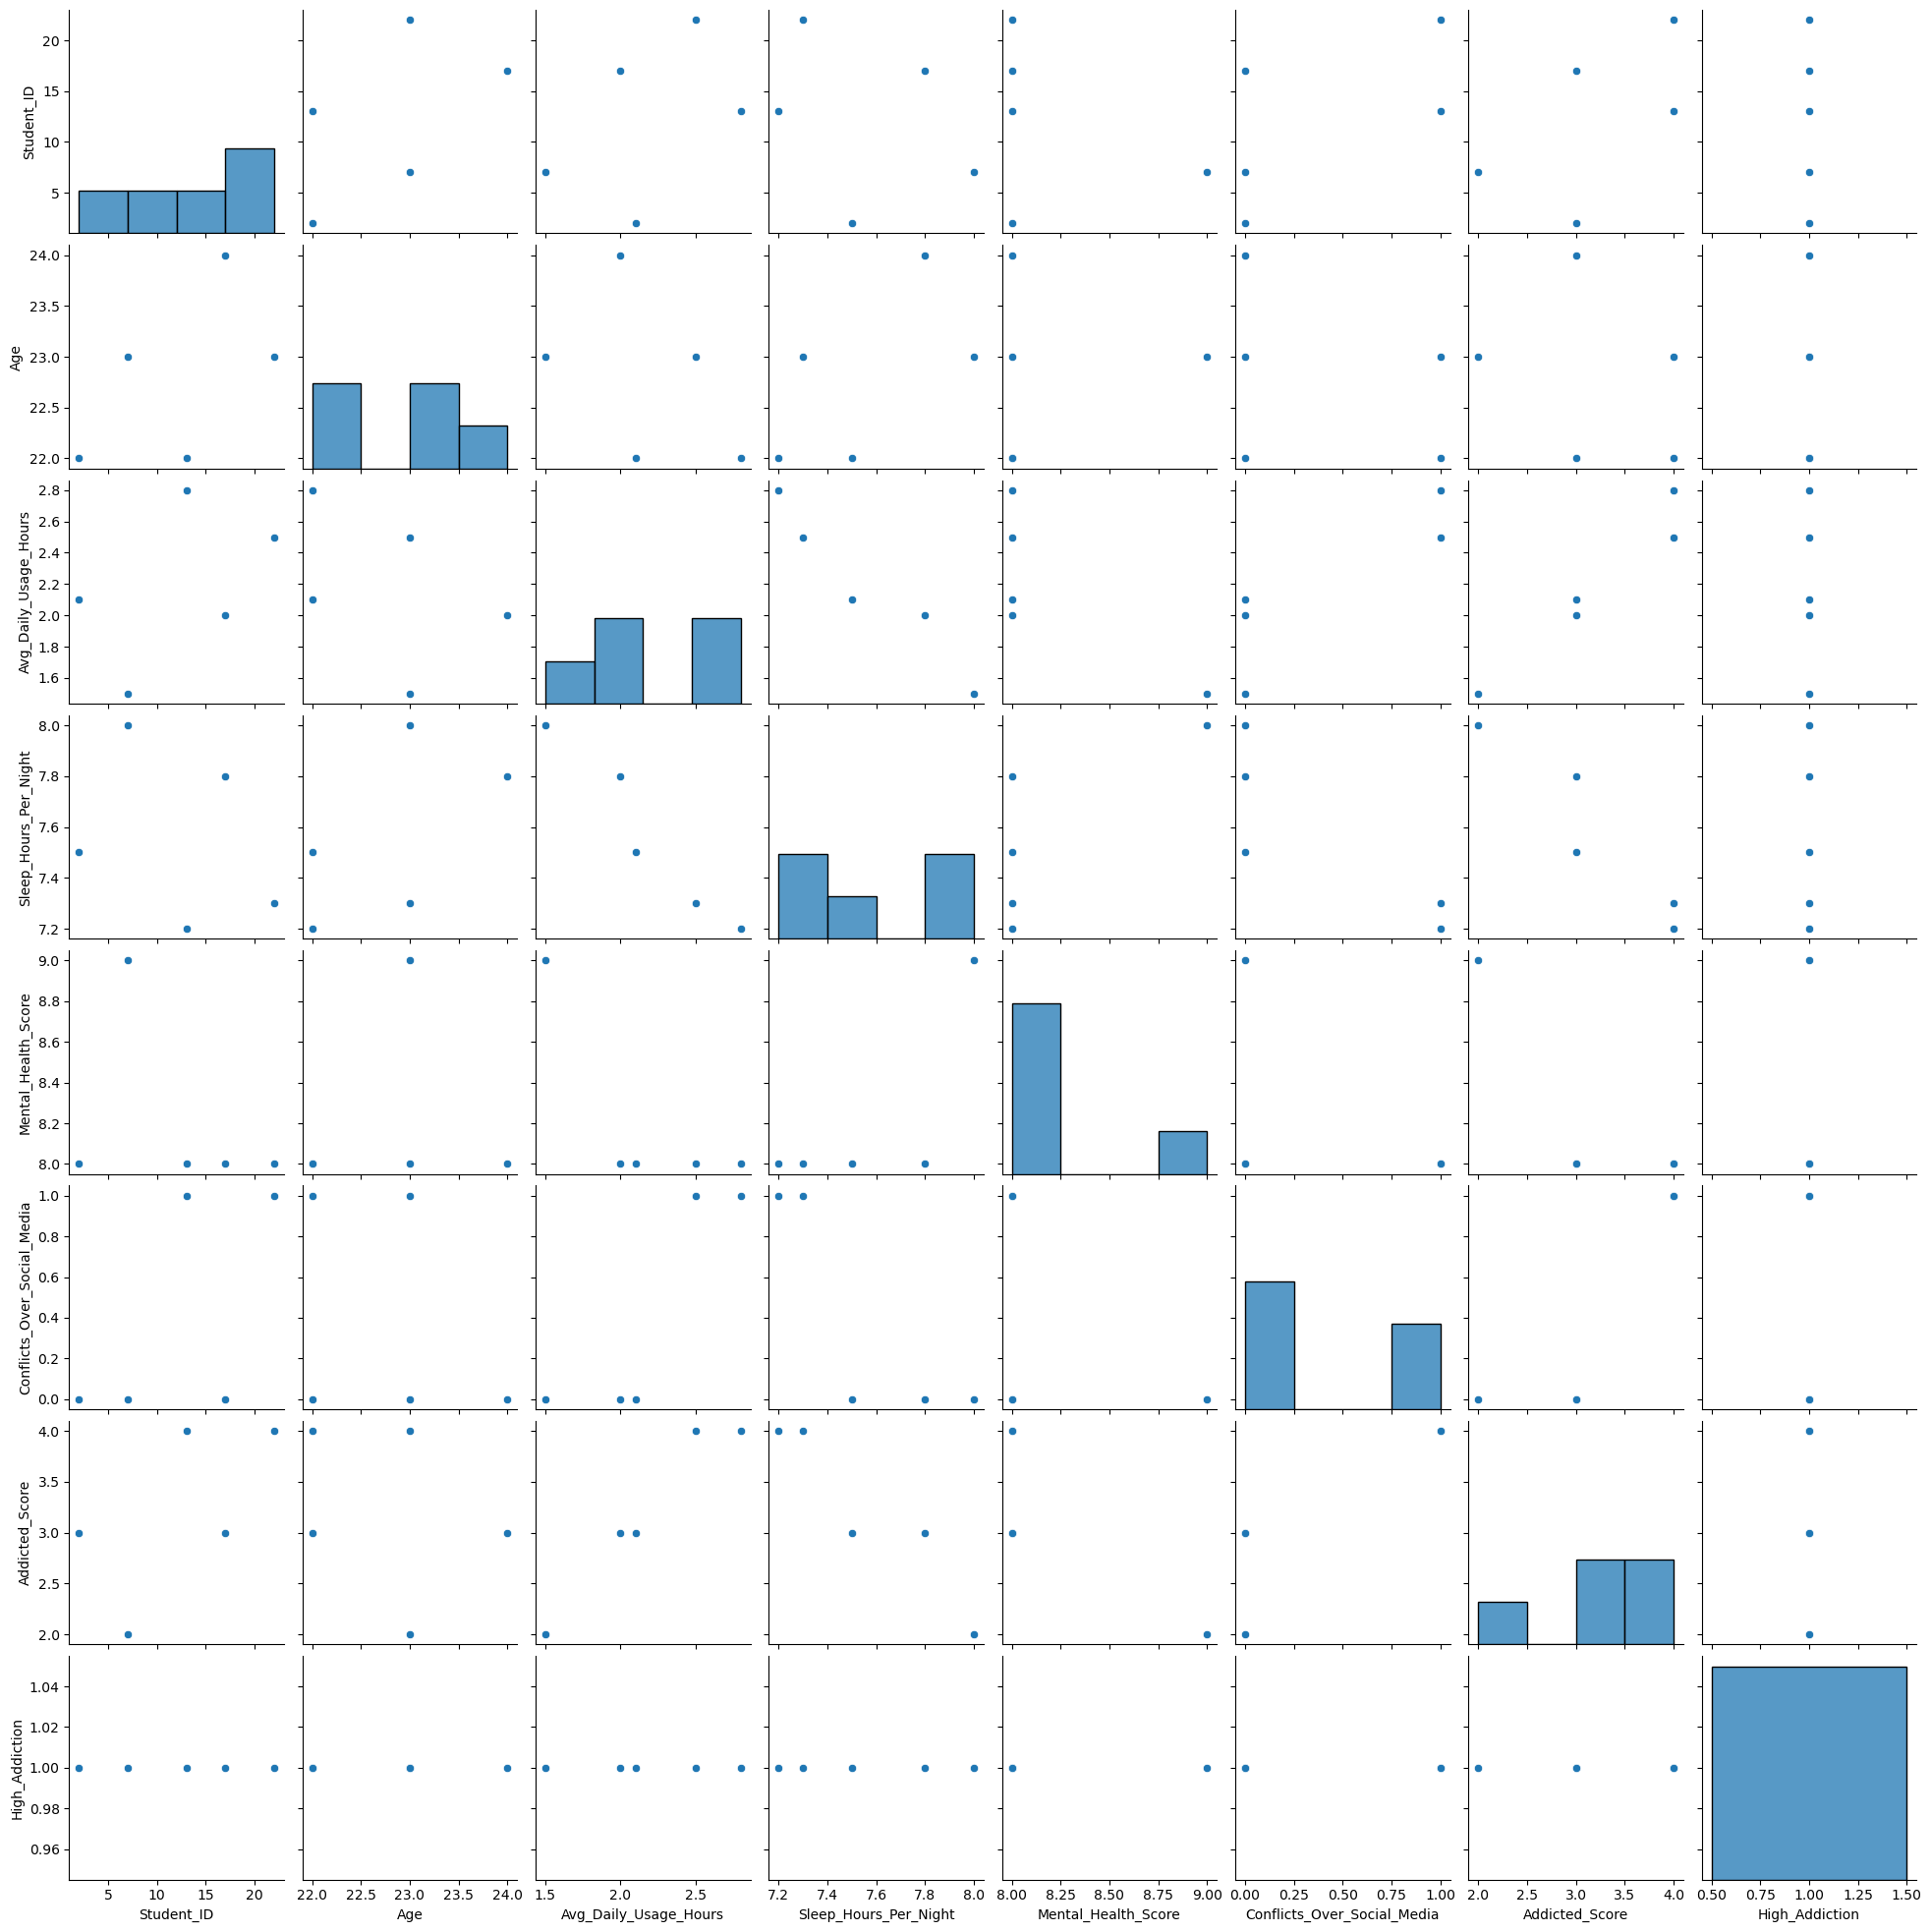

In [41]:
sns.pairplot(top5)

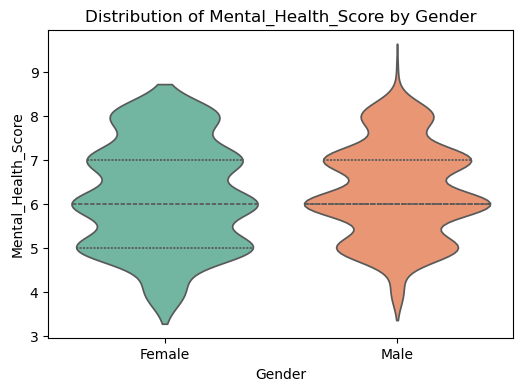

In [42]:
#Question 17 — Violin Plot: Addiction Score Distribution by Gender
plt.figure(figsize=(6,4))
sns.violinplot(x='Gender', y='Mental_Health_Score', data=df, inner='quartile', palette='Set2')
plt.title('Distribution of Mental_Health_Score by Gender')
plt.xlabel('Gender'); plt.ylabel('Mental_Health_Score')
plt.show()

In [43]:
#Question 18 — Heatmap: Average Addiction Score by AgeGroup and Platform
age = pd.to_numeric(df['Age'], errors='coerce')
df['AgeGroup'] = pd.cut(age, bins=[0,12,15,18,22,30,100], labels=['<=12','13-15','16-18','19-22','23-30','30+'])
pt = pd.pivot_table(df, values='Mental_Health_Score', index='AgeGroup', columns='Most_Used_Platform', aggfunc='mean')
pt

Most_Used_Platform,Facebook,Instagram,KakaoTalk,LINE,LinkedIn,Snapchat,TikTok,Twitter,VKontakte,WeChat,WhatsApp,YouTube
AgeGroup,,,,,,,,,,,,
16-18,NaN,5.000000,NaN,NaN,NaN,4.750000,5.400000,NaN,NaN,NaN,NaN,7.000000
19-22,6.774775,6.166667,6.0,8.0,7.833333,5.888889,5.750000,6.894737,7.0,6.538462,5.537037,6.555556
23-30,6.166667,5.636364,NaN,NaN,8.066667,NaN,5.333333,6.727273,NaN,6.000000,NaN,NaN


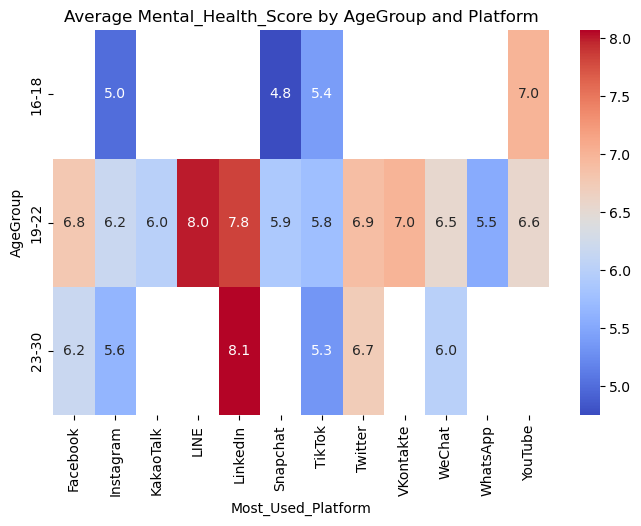

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(pt, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Mental_Health_Score by AgeGroup and Platform')
plt.xlabel('Most_Used_Platform'); plt.ylabel('AgeGroup')
plt.show()

In [45]:
#Question 19 — Donut Chart: Social Media Usage Category Distribution
hrs = pd.to_numeric(df['Avg_Daily_Usage_Hours'], errors='coerce')
df['UsageCategory'] = pd.cut(hrs, bins=[-1,0,1,3,6,12,24], labels=['0','0-1','1-3','3-6','6-12','12+'])
vc = df['UsageCategory'].value_counts().sort_index()
vc

UsageCategory
0         0
0-1       0
1-3      49
3-6     513
6-12    143
12+       0
Name: count, dtype: int64

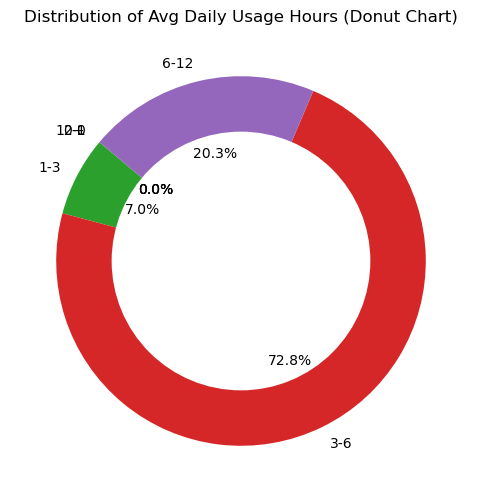

In [46]:
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(vc.values, labels=vc.index.astype(str), autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribution of Avg Daily Usage Hours (Donut Chart)')
plt.show()

In [47]:
#Question 20 — Distribution of Students by Country
country_counts = df['Country'].value_counts().head(10)
country_counts

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
Spain          27
Turkey         27
Ireland        27
Denmark        27
Switzerland    27
Name: count, dtype: int64

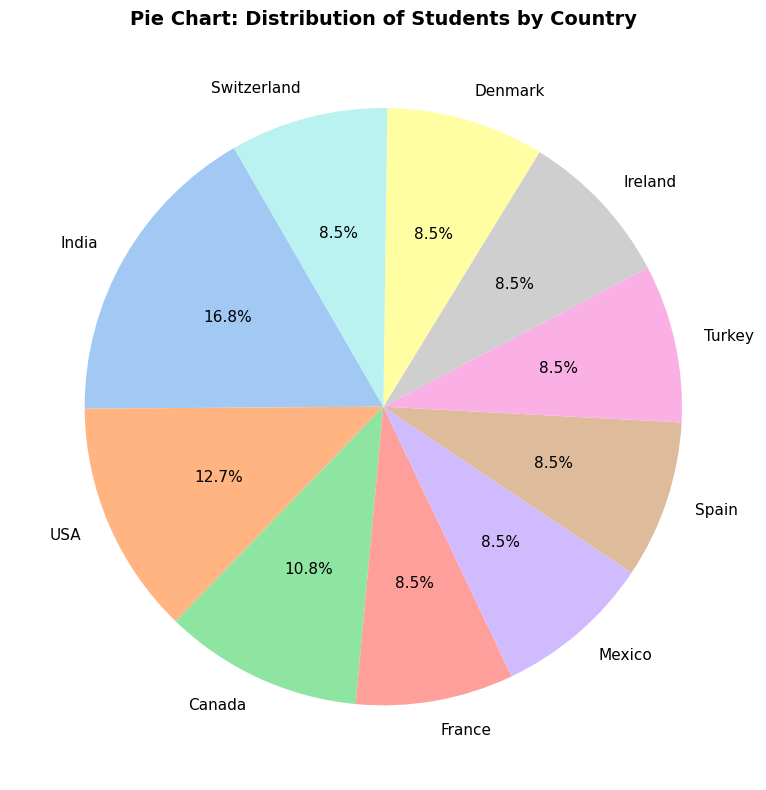

In [48]:
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:len(country_counts)]
plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=120,
    colors=colors,
    textprops={'fontsize': 11}
)
plt.title('Pie Chart: Distribution of Students by Country', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()